# Cargamos archivos y librerías

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
pd.set_option('display.float_format', '{:.6f}'.format)

In [3]:
df = pd.read_csv('wine.csv')
df.insert(loc=1, column='ones', value=1) 
df = df.iloc[:,1:]
df.head()

,ones,Label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,1,14.230000,1.710000,2.430000,15.600000,127,2.800000,3.060000,0.280000,2.290000,5.640000,1.040000,3.920000,1065
1,1,1,13.200000,1.780000,2.140000,11.200000,100,2.650000,2.760000,0.260000,1.280000,4.380000,1.050000,3.400000,1050
2,1,1,13.160000,2.360000,2.670000,18.600000,101,2.800000,3.240000,0.300000,2.810000,5.680000,1.030000,3.170000,1185
3,1,1,14.370000,1.950000,2.500000,16.800000,113,3.850000,3.490000,0.240000,2.180000,7.800000,0.860000,3.450000,1480
4,1,1,13.240000,2.590000,2.870000,21.000000,118,2.800000,2.690000,0.390000,1.820000,4.320000,1.040000,2.930000,735


In [4]:
df.shape

(178, 15)

# Partir el Array
Partimos el array en un training, validating (CV), y testing set.

In [5]:
ycolumn = df.pop('Label')
xcolumns = df

# Clasificando a la categoría 1

In [6]:
ycolumn_mod = np.array(ycolumn.replace({2:0, 3:0})).reshape(-1,1)

In [6]:
ycolumn_mod = ycolumn.replace({1:0, 2:1, 3:0})

In [7]:
ycolumn_mod = ycolumn.replace({1:0, 2:0, 3:1})

# Standarize X Columns

In [7]:
sc = StandardScaler()
xtransformed = sc.fit_transform(xcolumns)
xtransformed

array([[ 0.        ,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.        ,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.        ,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.        ,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.        ,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 0.        ,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(xtransformed, ycolumn_mod, test_size=0.2, random_state=433, shuffle=True)

# Funciones

In [75]:
def hypothesis(X, theta):
    z = X @ theta.T
    return 1/(1 + np.exp(-z))

def cost_function(X, y, theta):
    yh = hypothesis(X, theta)
    return (-1/len(X)) * np.sum(y*np.log(yh) + (1-y)*np.log(1-yh))

def gradient_descent(X, y, theta, learning_rate, max_iter = 2000):
    m = len(X)
    J = [cost_function(X, y, theta)]
    for i in range(0, max_iter):
        h = hypothesis(X, theta)
        for i in range(0, X.shape[1]):
            theta -= (learning_rate/m) * np.sum((h-y)*X[:, i])
        J.append(cost_function(X, y, theta))
    return J, theta

def predict(X, y, theta, learning_rate=0.00001, max_iter = 2000):
    J, th = gradient_descent(X, y, theta, learning_rate, max_iter) 
    yh = hypothesis(X, theta)
    for i in range(len(yh)):
        yh[i]=1 if yh[i]>=0.5 else 0
    y = list(y)
    acc = np.sum([y[i] == yh[i] for i in range(len(y))])/len(y)
    return J, acc, th

def valor_h(x_train, x_test, theta):    
    h_train = hypothesis(x_train, theta).mean()
    h_test = hypothesis(x_test, theta).mean()
    avg_h = (h_train + h_test) / 2
    return avg_h

def elegir_grado(x_arr, grado):
    if grado == 2:
        x_mod = x_arr ** 2
        x_arr_new = np.append(x_arr, x_mod, axis=1)
    elif grado == 3:
        x_mod = x_arr ** 3
        x_arr_new = np.append(x_arr, x_mod, axis=1)

    return x_arr_new

In [61]:
m, n =  xtrain.shape
theta = np.full((1,n), 0.5)

In [68]:
J, acc, arr_theta = predict(xtrain, ytrain, theta, learning_rate=0.0001)

In [76]:
valor_h(xtrain, xtest, arr_theta)

0.5454114923601321

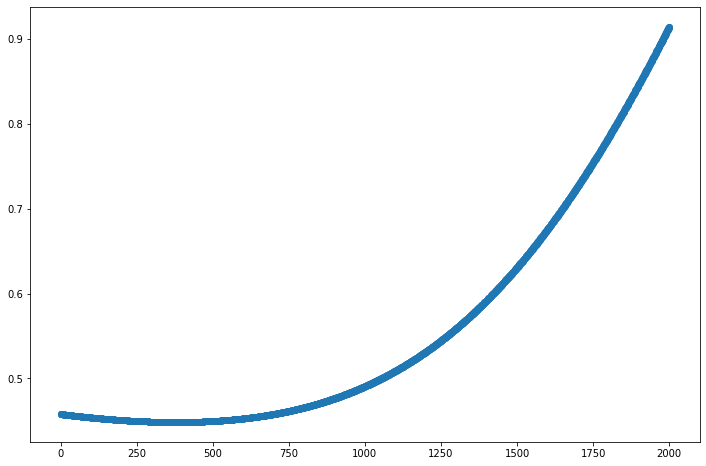

In [14]:
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J)), J)
plt.show()

### Con grado 2

In [80]:
xtrain2 = elegir_grado(xtrain, 2)
xtest2 = elegir_grado(xtest, 2)
m, n =  xtrain2.shape
theta = np.full((1,n), 0.5)

In [78]:
J, acc, arr_theta = predict(xtrain2, ytrain, theta, learning_rate=0.000001)

In [81]:
valor_h(xtrain2, xtest2, arr_theta)

0.3457789671393481

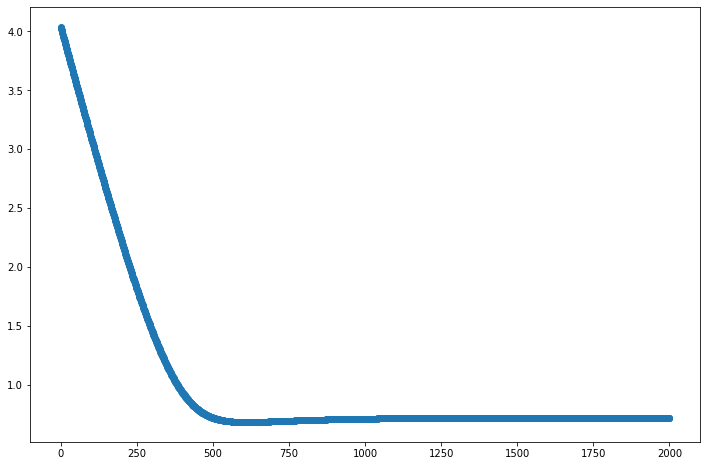

In [79]:
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J)), J)
plt.show()

In [82]:
xtrain3 = elegir_grado(xtrain, 3)
xtest3 = elegir_grado(xtest, 3)
m, n =  xtrain3.shape
theta = np.full((1,n), 0.5)

In [83]:
J, acc, arr_theta = predict(xtrain3, ytrain, theta, learning_rate=0.000001)

<ipython-input-75-5e909978a732>:7: RuntimeWarning: divide by zero encountered in log
  return (-1/len(X)) * np.sum(y*np.log(yh) + (1-y)*np.log(1-yh))


In [84]:
valor_h(xtrain3, xtest3, arr_theta)

0.5323429124793102

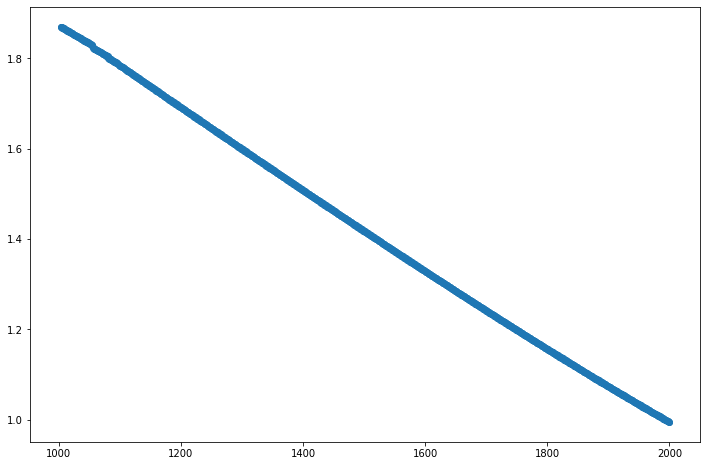

In [85]:
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J)), J)
plt.show()